# CLASSIFYING THE MNIST DATASET

Each image in the MNIST dataset is 28 pixels by 28 pixels on a grayscale. Each pixel corresponds to the intensity of the color (0 is black and 255 is white).

Each pixel is an input for our neural network. Given 28 x 28 pixels, we will have 784 input units in our input layer. Then we will linearly combine them and add a non-linearity to get the first hidden layer.

In this example, I built this model with two hidden layers. This is good enough to have a good accuracy.

Finally, there are 10 digits so we will have 10 output units in the output layer. The output will then be compared to the targets. It will use one hot encoding for both the outputs and the targets.

Given this, here are the steps we need take to create the model,
- Prepare the data and preprocess it. Create training, validation and test datasets.
- Outline the model and choose the activation functions.
- Set the appropriate advanced optimizers and the loss function
- Let the model learn
- Test the accuracy of the model

Now, let's proceed to build a neural network with 2 hidden layers.

## Import the relevant libraries

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
# Split the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
# Input layer
model.add(tf.keras.layers.Flatten())

# 2 Hidden layers
# relu = rectified linear function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Output layer
# Parameter is the number of expected output classifications
# softmax for probability distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Loss is the degree of error, nn always tries to minimize loss so computation of loss is important in relation to the accuracy of the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and pass what do we want to fit
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9247
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1075 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0714 - accuracy: 0.9776


In [5]:
# Evaluate the model in the test data
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0932 - accuracy: 0.9707
0.09318621456623077 0.9707000255584717


In [6]:
# Save the model
# model.save('effective_num_reader.model')

In [8]:
# Load the model
new_model = tf.keras.models.load_model('effective_num_reader.model')

In [9]:
# Run predictions on the x_test
predictions = new_model.predict([x_test])

In [12]:
# Print output
print(np.argmax(predictions[1]))

2


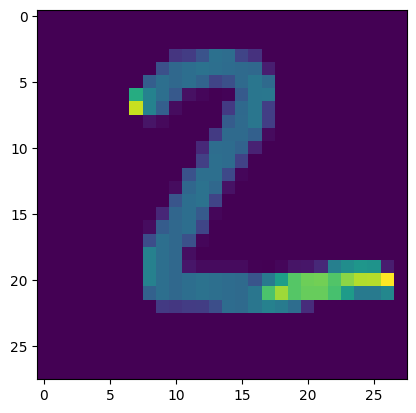

In [13]:
plt.imshow(x_test[1])
plt.show()